In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import json, datetime, os, sys
%matplotlib inline

# Nepal

In [299]:
n_data = pd.read_csv('nepal.log', header=None, names=['user','time','local'], index_col=False)
n_data['time'] = pd.to_datetime(n_data.time)

In [300]:
n_data.head()

,user,time,local
0,HRJ_District,2009-12-05 17:59:29,True
1,HRJ_District,2009-12-05 17:59:29,False
2,katpatuka,2009-11-19 09:49:52,True
3,katpatuka,2009-11-19 09:49:52,False
4,Nirab Pudasaini,2013-12-19 11:42:30,False


In [301]:
n_local    = n_data.query('local').copy()
n_external = n_data.query('local==False').copy()

In [302]:
n_local_cnt = n_local.groupby(n_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
n_local_unq = n_local.groupby(n_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})
n_external_cnt = n_external.groupby(n_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
n_external_unq = n_external.groupby(n_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})

In [303]:
new_dates = pd.date_range('04/01/2015', periods=365, freq='D')

In [314]:
n_plot = pd.concat(
    [n_local_cnt.reindex(new_dates), 
     n_local_unq.reindex(new_dates), 
     n_external_cnt.reindex(new_dates), 
     n_external_unq.reindex(new_dates)], axis=1)
n_plot.columns = ['local edits','local users','external edits', 'external users']

In [315]:
n_plot.head()

,local edits,local users,external edits,external users
2015-04-01,38.0,3.0,589,10
2015-04-02,68.0,3.0,1004,10
2015-04-03,48.0,5.0,321,6
2015-04-04,6.0,1.0,170,3
2015-04-05,78.0,11.0,691,17


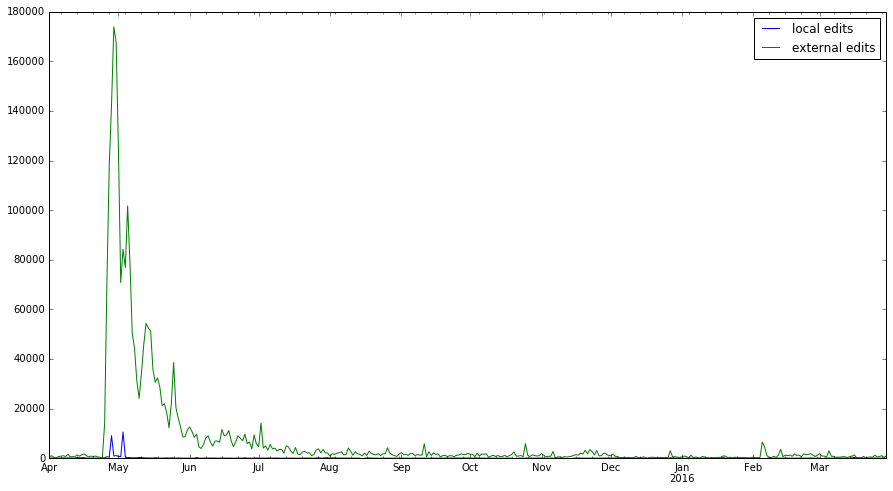

In [316]:
n_plot[['local edits','external edits']].plot(figsize=(15,8))

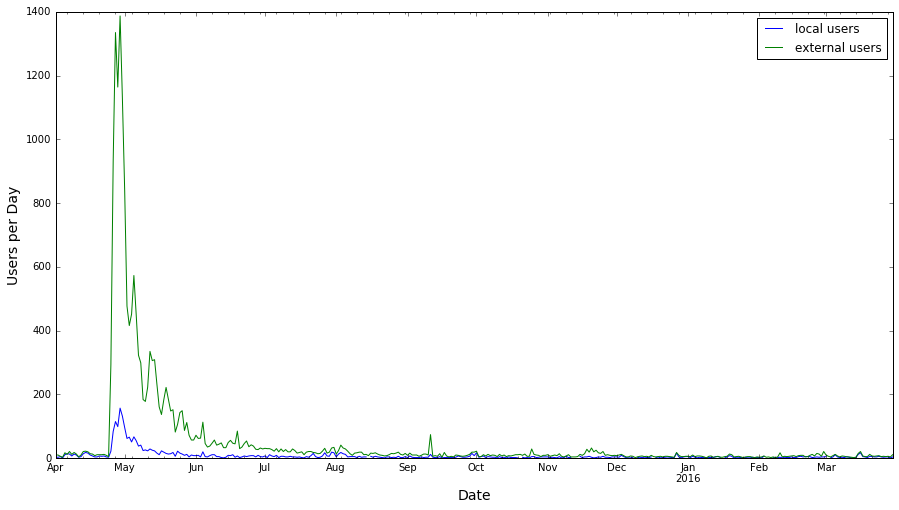

In [368]:
ax = n_plot[['local users','external users']].plot(figsize=(15,8))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Users per Day", fontsize=14)

# Colorado

In [308]:
c_data = pd.read_csv('colorado.log', header=None, names=['user','time','local'], index_col=False)
c_data['time'] = pd.to_datetime(c_data.time)

In [309]:
c_data.head()

,user,time,local
0,iandees,2008-05-11 04:44:20,True
1,Seldom,2009-02-13 03:13:00,False
2,Seldom,2009-02-22 02:24:15,False
3,SK53_bulk,2010-03-08 19:12:58,False
4,SK53_bulk,2010-03-08 19:24:29,False


In [310]:
c_local    = c_data.query('local').copy()
c_external = c_data.query('local==False').copy()

In [311]:
c_local_cnt = c_local.groupby(c_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
c_local_unq = c_local.groupby(c_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})
c_external_cnt = c_external.groupby(c_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
c_external_unq = c_external.groupby(c_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})

In [341]:
new_dates = pd.date_range('2007-01-01', periods=365*10-60, freq='D')

In [352]:
c_plot = pd.concat(
    [c_local_cnt.reindex(new_dates), 
     c_local_unq.reindex(new_dates), 
     c_external_cnt.reindex(new_dates), 
     c_external_unq.reindex(new_dates)], axis=1)
c_plot.columns = ['local knowledge edits','local knowledge users','external edits', 'external users']

In [353]:
c_plot.head()

,local knowledge edits,local knowledge users,external edits,external users
2007-01-01,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN


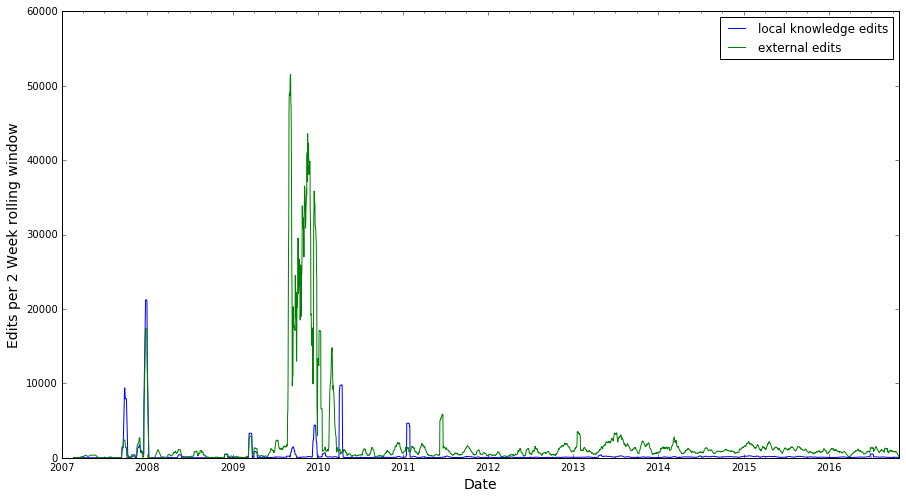

In [364]:
ax = c_plot[['local knowledge edits','external edits']].fillna(method='ffill').rolling(14).mean().plot(figsize=(15,8))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Edits per 2 Week rolling window", fontsize=14)

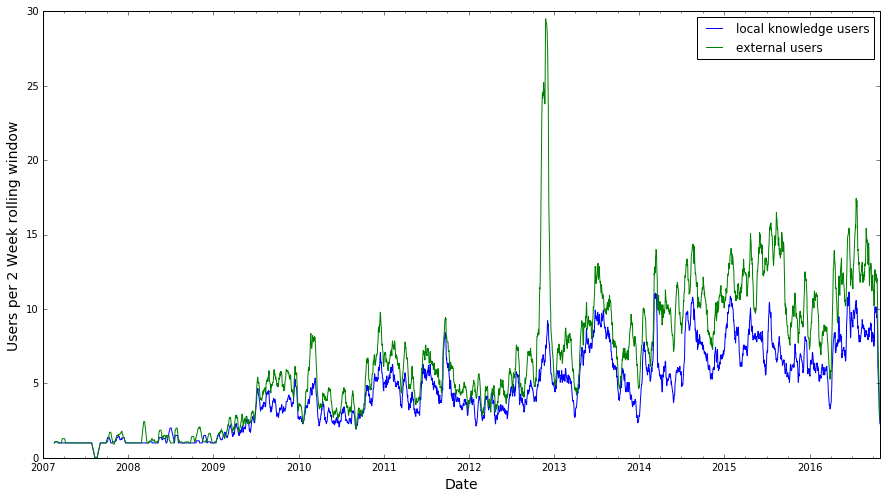

In [369]:
ax = c_plot[['local knowledge users','external users']].fillna(method='ffill').rolling(14).mean().plot(figsize=(15,8))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Users per 2 Week rolling window", fontsize=14)